# Telcom Churn group case study

## Problem Statement
- Telcome Churn Case stidy - The main objective of this case study to identify the custoomer who is likely to churn and to build the predictive model to identify such customer. 

### Business Objective
 Telecome Industry is highly competitive industry. The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Many top operators main goal is customer retention. There are mainly two type of churn they are **Usage based churn and Revenue Based Churn**. In this case study we are analysing the Usage based churn.vol_2g_mb_9,vol_3g_mb_9. We need to identify the high value customers who are at high risk of churn by using predicting method.
 
 
- To predict the churn in the ninth month we need to use the feaures namely ,total_ic_mou_9, total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9.
     
    

### Dataset
- This dataset contain the data for the three months namely June, July,August and September.

### Steps
1. Understanding and Preparing the Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Modeling
5. Model Evaluation
6. Observations and Recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

import pandas as pd
pd.options.display.max_columns=None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

# Step 1: Understanding and Preparing the Data

In [2]:
#Reading the csv file
telecom_data=pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Display dimension of the data
telecom_data.shape

(99999, 226)

In [4]:
#Lets got through the list of columns
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
#Lets inspect the column wise count of non null entries count & datatype for each column
telecom_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
#Lets check the statistical aspects of the numerical data
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
def missing_value(value):
    total=value.isnull().sum().sort_values(ascending=False)
    percent=(value.isnull().sum()/value.isnull().count()*100).sort_values(ascending=False).round(2)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [8]:
missing_value(telecom_data)

,Total,Percent
count_rech_2g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
count_rech_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
max_rech_data_6,74846,74.85
total_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85
arpu_2g_6,74846,74.85
night_pck_user_6,74846,74.85
fb_user_6,74846,74.85


### It can be seen from the above percentages that there are a quit a few columns with more than 70% missing values, and that they do not add much information to the analysis. 
### The point is that we have to define high-value customers as - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
### So we need not drop these columns instead we would apply a logic which suggests that: 'total_rech_data_6' and 'date_of_last_rech_data_6' both (same with the column 7 and 8) have null values at the same index. If they are the same we would impute the data with 0.

In [9]:
total_rech_data_6_index=telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index=telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


### Since the output matched our assumption we can impute the missing 'total_rech_data_6' and 'av_rech_amt_data_6' values with 0 

In [10]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

### The same can be perfomrmed for the rest of the 'good phase' columns

In [11]:
total_rech_data_7_index=telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index=telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [12]:
telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

In [13]:
total_rech_data_8_index=telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index=telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [14]:
telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)

In [15]:
missing_value(telecom_data)

,Total,Percent
night_pck_user_6,74846,74.85
fb_user_6,74846,74.85
count_rech_3g_6,74846,74.85
max_rech_data_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85
arpu_2g_6,74846,74.85
count_rech_2g_6,74846,74.85
fb_user_7,74428,74.43
date_of_last_rech_data_7,74428,74.43


## Data Exploration

## Derive a new feature
### The ‘good’ phase: In this phase, the customer is happy with the service provided by telecom operator and behaves as usual.

### Since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

In [16]:
#Lets calculate the Total recharge amount data and save them in a column
telecom_data['total_data_rech_amt_6']= telecom_data['total_rech_data_6']*telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7']= telecom_data['total_rech_data_7']*telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8']= telecom_data['total_rech_data_8']*telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9']= telecom_data['total_rech_data_9']*telecom_data['av_rech_amt_data_9']

In [17]:
#Dropping the total_rech_data and av_rech_amt_data for all the four months 
#as it will be redundant to have total recharge amount data and these two columns

#Dropping the columns
telecom_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 
               'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],axis=1, inplace=True)

In [18]:
#Check the current shape of the 
telecom_data.shape

(99999, 222)

In [19]:
# Deriving new feature- Average recharge amount during good phase
# Create a new column to capture average recharge per customer for the first 2 months
telecom_data['avg_recharge_amount_month_6_7'] = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7',
                                                              'total_rech_amt_6','total_rech_amt_7']].mean(axis = 1)

In [20]:
#We can calculate the 70th percentile of the avg_recharge_amount_month_6_7
seventy_percentile = np.percentile(telecom_data['avg_recharge_amount_month_6_7'] ,70)
High_Value_Cust=telecom_data[(telecom_data['avg_recharge_amount_month_6_7'] > seventy_percentile)]

In [21]:
High_Value_Cust.shape

(29953, 223)

## Tag churners and remove attributes of the churn phase

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

### There are no null values in the above columns

In [22]:
#Checking the condition that Incomming,outgoing calls and data volumne are not equal to zero 
High_Value_Cust['churn'] = (
    (High_Value_Cust['total_ic_mou_9'] == 0) &
    (High_Value_Cust['total_og_mou_9'] == 0) &
    (High_Value_Cust['vol_2g_mb_9'] == 0) &
    (High_Value_Cust['vol_3g_mb_9'] == 0)).astype(int)

In [23]:
High_Value_Cust.shape

(29953, 224)

In [24]:
print('Churn Customer: ',len(High_Value_Cust[High_Value_Cust['churn']==1]))
print('Non-Churn Customer: ',len(High_Value_Cust[High_Value_Cust['churn']==0]))

Churn Customer:  2433
Non-Churn Customer:  27520


In [25]:
(High_Value_Cust['churn'].value_counts()/len(High_Value_Cust)*100).round(2)

0    91.88
1     8.12
Name: churn, dtype: float64

- we can find that
- The Percentage of churn is 8.12% and
- the Percentage of Non-churn is 91.88%.

# Step 2: Data Cleaning

## Renaming the columns in the correct format 

In [26]:
#Renaming the following columns in the format following the convention in the dataset i.e. appending with the month number
# jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g

High_Value_Cust.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 
                                   'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [27]:
#Printing all the columns with '_9' as ending
cols_with_9=[col for col in telecom_data.columns if '_9' in col]
cols_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_data_rec

In [28]:
print("The number of columns containing '_9' are:",len(cols_with_9))

The number of columns containing '_9' are: 53


In [29]:
#Dropping the columns
High_Value_Cust.drop(cols_with_9,axis=1,inplace=True)
High_Value_Cust.shape

(29953, 171)

In [30]:
#Dropping the column that was added to calculate th average of good phase
High_Value_Cust.drop('avg_recharge_amount_month_6_7', axis=1, inplace=True)
High_Value_Cust.shape

(29953, 170)

## Checking the unique values of the columns

In [31]:
pd.DataFrame(High_Value_Cust.nunique())

,0
mobile_number,29953
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
arpu_6,29029
arpu_7,29040


In [32]:
#Finding the columns with only one value and saving it separetely
cols_with_one_val=list(High_Value_Cust.columns[High_Value_Cust.nunique()==1])
cols_with_one_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

### We can drop these columns since they only contain one column and will not be very useful in the model building process

In [33]:
High_Value_Cust.drop(cols_with_one_val,axis=1,inplace=True)

In [34]:
High_Value_Cust.shape

(29953, 157)

### We can handle the columns with date strored as object since we would need to convert them in date format

In [35]:
date_cols = High_Value_Cust.columns[High_Value_Cust.columns.str.contains('date')]
print(date_cols)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [36]:
#Checking for the missing values again
missing_value(High_Value_Cust)

,Total,Percent
arpu_2g_8,14018,46.80
night_pck_user_8,14018,46.80
count_rech_3g_8,14018,46.80
count_rech_2g_8,14018,46.80
max_rech_data_8,14018,46.80
arpu_3g_8,14018,46.80
date_of_last_rech_data_8,14018,46.80
fb_user_8,14018,46.80
count_rech_2g_6,13213,44.11
max_rech_data_6,13213,44.11


In [37]:
#Deleting arpu_2g, arpu_3g for the months 6,7 & 8 as has large number of null values
arpu_cols=['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']
High_Value_Cust.drop(columns=arpu_cols, inplace=True)

In [38]:
#Replacing all the data fields having the null values with 0
data_6=["total_data_rech_amt_6", "count_rech_2g_6", "count_rech_3g_6", "max_rech_data_6", "night_pck_user_6", "fb_user_6"]
data_7=["total_data_rech_amt_7", "count_rech_2g_7", "count_rech_3g_7", "max_rech_data_7", "night_pck_user_7", "fb_user_7"]
data_8=["total_data_rech_amt_8", "count_rech_2g_8", "count_rech_3g_8", "max_rech_data_8", "night_pck_user_8", "fb_user_8"]

# replaceing null values by 0 for data usage variables
for value in data_6:
    High_Value_Cust[value]=High_Value_Cust[value].replace(np.NaN,0)
for value in data_7:
    High_Value_Cust[value]=High_Value_Cust[value].replace(np.NaN,0)
for value in data_8:
    High_Value_Cust[value]=High_Value_Cust[value].replace(np.NaN,0)

In [39]:
missing_value(High_Value_Cust)

,Total,Percent
date_of_last_rech_data_8,14018,46.80
date_of_last_rech_data_6,13213,44.11
date_of_last_rech_data_7,12915,43.12
std_ic_t2f_mou_8,1172,3.91
spl_og_mou_8,1172,3.91
loc_og_mou_8,1172,3.91
std_og_t2t_mou_8,1172,3.91
std_og_t2m_mou_8,1172,3.91
std_og_t2f_mou_8,1172,3.91
loc_ic_t2t_mou_8,1172,3.91


In [40]:
High_Value_Cust.shape

(29953, 151)

### Treating null values as we can see above most of the columns belongs to minutes of usage(mou). We can fill all those columns with zeroselecting and assigning  the MOU columns

In [41]:
#Since these columns are 'Object' datatype it is better to use this method (than the earlier one shown above)
mou_cols =High_Value_Cust.columns[High_Value_Cust.columns.str.contains('mou')]
# replaceing null values by 0 for minutes of usage variables
High_Value_Cust.loc[:,mou_cols] = High_Value_Cust.loc[:,mou_cols].replace(np.NaN,0)

In [42]:
# Checking the null percenatge for only the null values
null_data =round(100*(High_Value_Cust.isnull().sum()/len(High_Value_Cust.index)), 2)
null_data= null_data[null_data!=0]
null_data

og_others_6                  1.81
og_others_7                  1.79
og_others_8                  3.91
ic_others_6                  1.81
ic_others_7                  1.79
ic_others_8                  3.91
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

### OG_others and IC_other indicates no outgoing and incomming to others they can replace the OG_others and IC_other with zero 

In [43]:
others_cols=['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8']

In [44]:
for value in others_cols:
    High_Value_Cust[value]=High_Value_Cust[value].replace(np.NaN,0)

In [45]:
# Checking the null percenatge for only the null values
null_data =round(100*(High_Value_Cust.isnull().sum()/len(High_Value_Cust.index)), 2)
null_data= null_data[null_data!=0]
null_data

date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

In [46]:
date_cols = High_Value_Cust.columns[High_Value_Cust.columns.str.contains('date')]
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [47]:
for values in date_cols:
    print(values)
    High_Value_Cust[values]=pd.to_datetime(High_Value_Cust[values])
    #Assignment to day format 
    High_Value_Cust[values]=High_Value_Cust[values].dt.day
    #Replacing with Null values
    High_Value_Cust[values]=High_Value_Cust[values].replace(np.NaN,0)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [48]:
#Checking the missing values for one last time to make sure that the all values are Not Null
missing_value(High_Value_Cust)

,Total,Percent
churn,0,0.0
loc_ic_t2t_mou_6,0,0.0
total_og_mou_7,0,0.0
total_og_mou_6,0,0.0
og_others_8,0,0.0
og_others_7,0,0.0
og_others_6,0,0.0
spl_og_mou_8,0,0.0
spl_og_mou_7,0,0.0
spl_og_mou_6,0,0.0


### All missing values have been imputed successfully 

In [49]:
#Making sure all the date cols are as expected
High_Value_Cust[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,21.0,16.0,8.0,21.0,16.0,8.0
7,27.0,25.0,26.0,0.0,0.0,0.0
8,25.0,31.0,30.0,0.0,31.0,23.0
21,30.0,31.0,31.0,0.0,0.0,0.0
23,18.0,7.0,24.0,0.0,7.0,6.0


# Step 3: Exploratory Data Analysis 

### Analysis on MOU(mins of usage of calls)

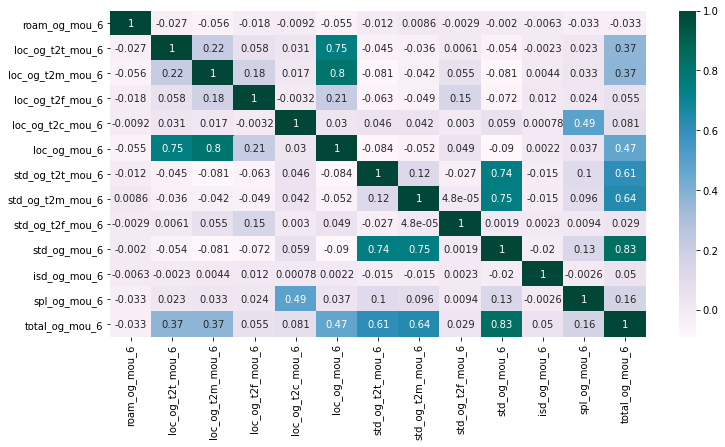

In [50]:
# Lets consider the outgoing calls usage of month 6
mou_og_month6=High_Value_Cust.columns[High_Value_Cust.columns.str.contains('.*_og_.*mou_6',regex=True)]
Month6_mou=High_Value_Cust[mou_og_month6]
#Plot heat map to view the variables are highly correlated 
plt.figure(figsize=(12,6))
sns.heatmap(Month6_mou.corr(), annot = True, cmap='PuBuGn')
plt.show()

#### Analysis:
- Columns " total_og_mou_6" ,"std_og_mous_6", "loc_og_mou_6","std_og_t2t_mous_6",std_og_t2f_mou_6","loc_og_t2t_mous_6",loc_og_t2f_mou_6" are highly correlated.

- And we need to check and avoid multicolinearity issues

In [51]:
#Removing the corelated variables from the dataset assign the cols to remove
cols=['total_og_mou_6','std_og_mou_6','loc_og_mou_6','total_og_mou_7','std_og_mou_7','loc_og_mou_7','total_og_mou_8',
      'std_og_mou_8','loc_og_mou_8']
# Dropping the  columns
High_Value_Cust.drop(cols, inplace = True, axis = 1)

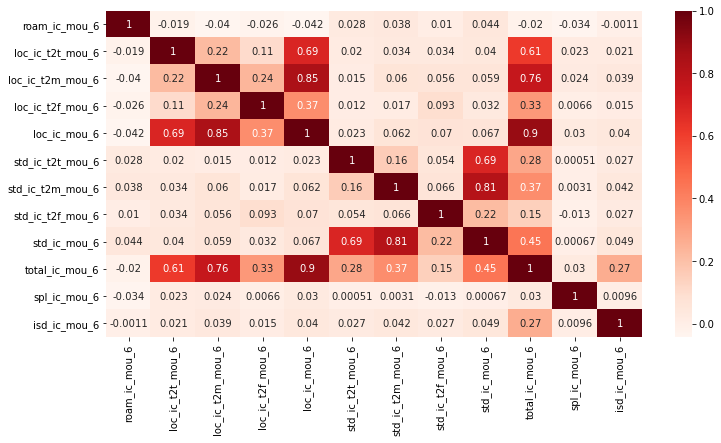

In [52]:
#Incoming calls for month 6
# Filtering the columns
mou_ic_month6 = High_Value_Cust.columns[High_Value_Cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
# extarcting the data
Month6_mou_incoming = High_Value_Cust[mou_ic_month6]
#Plot heat map to view the variablea are highly corelated
plt.figure(figsize = (12,6))
sns.heatmap(Month6_mou_incoming.corr(), annot = True, cmap='Reds')
plt.show()

#### Analysis:
- Columns " total_ic_mou_6" ,"std_ic_mous_6", "loc_ic_mou_6","std_ic_t2t_mous_6",std_ic_t2m_mou_6","loc_ic_t2t_mous_6",loc_og_t2m_mou_6" are highly correlated.

- And we need to check and avoid multicolinearity issues

In [57]:
# A functon to display bar chart when columns are passed
# Plotting over here is based on avaerge
def mean_bar_chart_plot(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)
    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})
    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)
    mean_bar.T.plot.bar(figsize=(10,5),color=['teal','coral'])
    plt.show()
    return mean_bar

### Analysis on 2G/3G Schemes and vbc

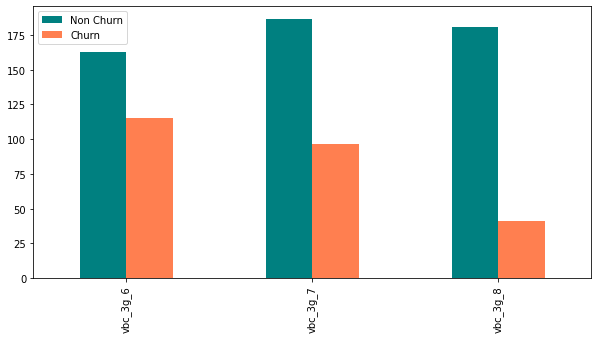

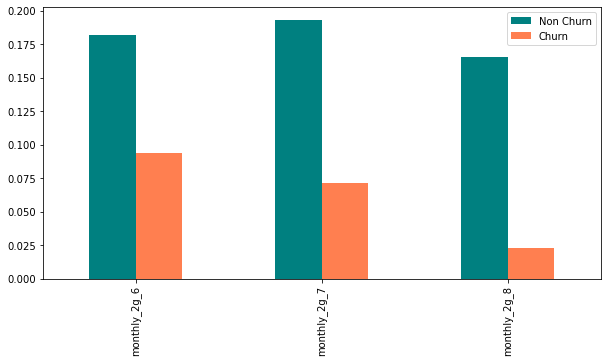

,monthly_2g_6,monthly_2g_7,monthly_2g_8
Non Churn,0.181613,0.193096,0.165080
Churn,0.093711,0.071106,0.023017


In [58]:
#Plotting bar chart by taking the average (2G/3G scheme)
#Plotting bar chart by taking the average (Volume based schme)
cols=['vbc_3g_6','vbc_3g_7','vbc_3g_8']
mean_bar_chart_plot(High_Value_Cust, cols)

cols=['monthly_2g_6','monthly_2g_7','monthly_2g_8']
mean_bar_chart_plot(High_Value_Cust, cols)

##### Analysis:

It is clearly visisble that the Churn Customers opted less for 2G/3G schemes and Volume based subscription in all 3 months.
However there is major dip on 8th (august) month

### Analysis on sachet (Service schemes with validity smaller than a month) and Monthly scheme  -2G/3G

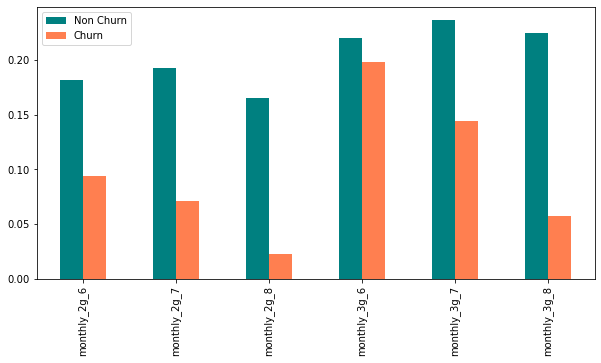

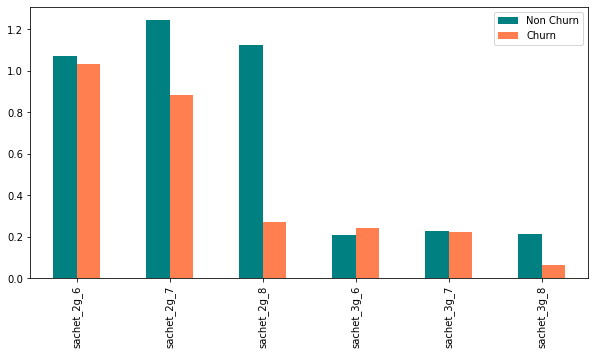

In [60]:
# Consider the below columns to be provided for plotting mean bar chart based on:
# 1. sachet (Service schemes with validity smaller than a month)-2g/3G 
# 2. Monthly Scheme- Service schemes with validity equivalent to a month
#Plotting bar chart by taking the average (2G/3G scheme)
#Plotting bar chart by taking the average (Monthly Scheme-2g/3g)
cols=['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
mean_bar_chart_plot(High_Value_Cust, cols)

cols=['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8']
mean_bar_chart_plot(High_Value_Cust, cols)
plt.show()

- Analysis
- there is drop in the Sachet and monthly services on 8th month for churned customer.

In [61]:
#Removing the correlated variables from the dataset
# assign the cols to remove
cols=['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8', 'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6',
      'total_ic_mou_7','total_ic_mou_8']
# Dropping the  columns
High_Value_Cust.drop(cols, inplace = True, axis = 1)

In [62]:
High_Value_Cust.shape

(29953, 133)

### Analysis on AON - Age Of Network

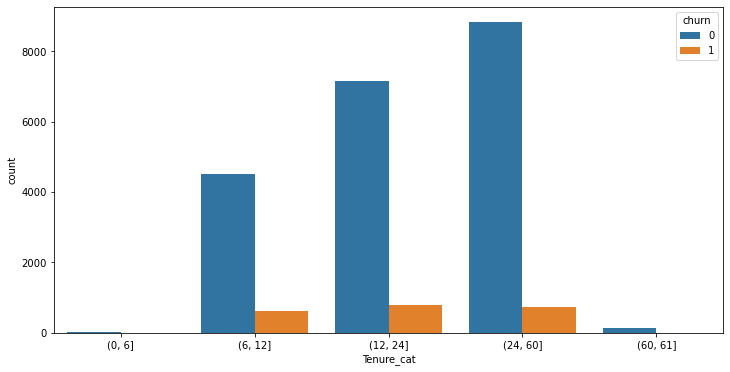

In [63]:
#Copy into another dataframe for ease 
plt.figure(figsize=[12,6])
Customer_since=High_Value_Cust.copy()
#Making the values day wise
Customer_since['tenure']=Customer_since['aon']/30
#Perfoming the cut command
tn_range=[0,6,12,24,60,61]
tn_label=["0-6 Months","6-12 Months","1-2 Yrs","2-5 Yrs","5 Yrs+"]
Customer_since['Tenure_cat']=pd.cut(Customer_since['tenure'],tn_range,tn_label)
sns.countplot(data=Customer_since,x=Customer_since.Tenure_cat,hue=Customer_since.churn)
plt.show()

- From the above graph we can say that customer is likely to churn after 6th month.

## Derive New Features

In [64]:
#Copying the dataframe into another for ease 
HV_df = High_Value_Cust.copy()

In [65]:
#Finding the unique columns that have the same name(befor the suffix) for 6th and 7th month
col_list = High_Value_Cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num',
       'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'date_of_last_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'vol_2g_mb', 'vol_3g_mb',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'vbc_3g', 'total_data_rech_amt'],
      dtype='object')

In [66]:
#Finding the average of good phase columns i.e. 6th and 7th month columns
for col in (col_list.unique()):
    avg_col_name = "avg_"+col+"_67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    HV_df[avg_col_name] = (HV_df[col_6]  + HV_df[col_7])/ 2

In [67]:
HV_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_date_of_last_rech_67,avg_last_day_rch_amt_67,avg_date_of_last_rech_data_67,avg_max_rech_data_67,avg_count_rech_2g_67,avg_count_rech_3g_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,avg_vbc_3g_67,avg_total_data_rech_amt_67
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,21.0,16.0,8.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,18.5,252.0,18.5,252.0,0.0,1.0,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,50.600,252.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.

In [68]:
#Dropping the columns with the suffix '_6' or '_7'
cols_to_drop= HV_df.filter(regex='_6$|_7$').columns
cols_to_drop
HV_df.drop(cols_to_drop, axis=1, inplace=True)

In [69]:
HV_df.shape

(29953, 90)

## Outlier Analysis

In [74]:
#Function to show outlier graph for all the columns
def Plot_outliers():
    columnList = (list(HV_df.columns[:]))
    columnList.remove('churn')
    for count, eachColumn in enumerate(columnList):
        if(count%2 == 0):
            plt.figure(count, figsize=(12,4))
            ax = plt.subplot(121)
            sns.boxplot(y = HV_df[eachColumn], x = HV_df['churn'])
            ax.set_xticklabels(['Not-Churn','churn'])
        else:
            ax = plt.subplot(122)
            sns.boxplot(y = HV_df[eachColumn], x = HV_df['churn'])
            ax.set_xticklabels(['Not-Churn','churn'])

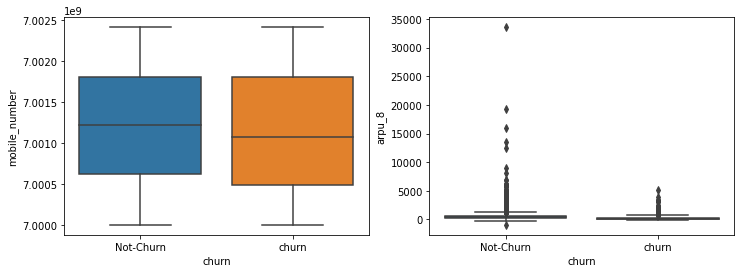

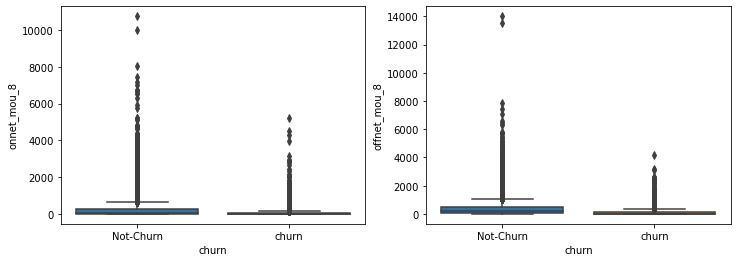

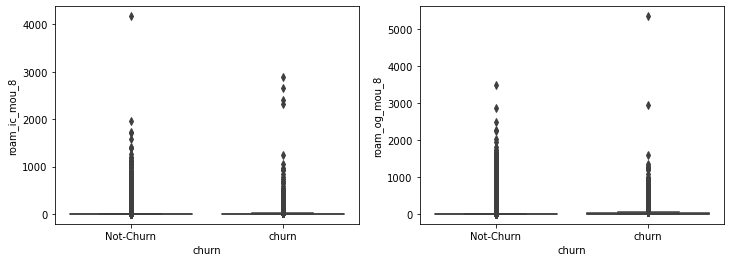

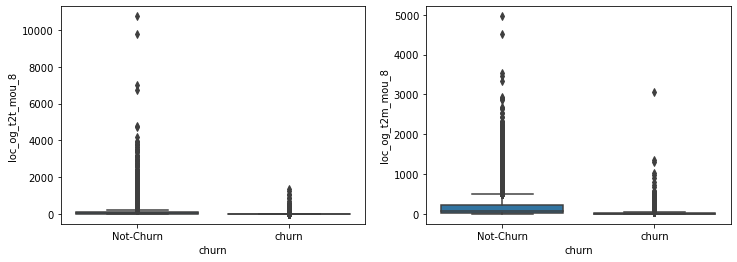

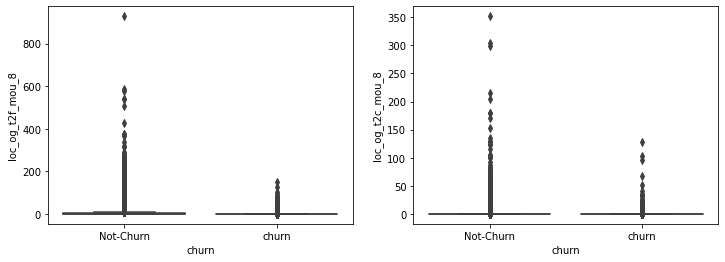

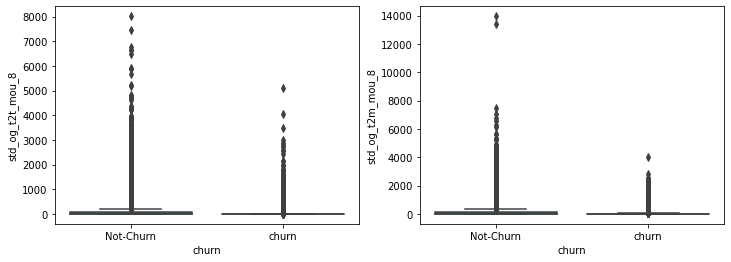

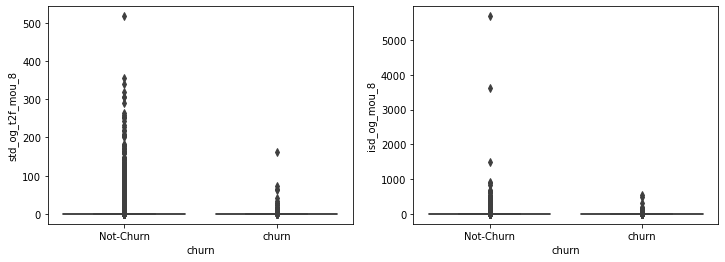

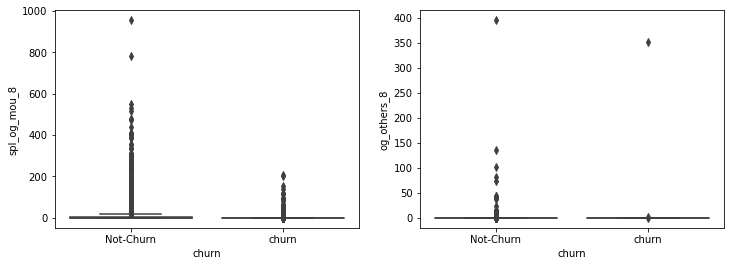

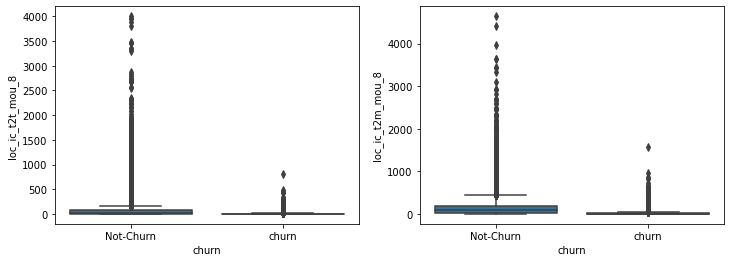

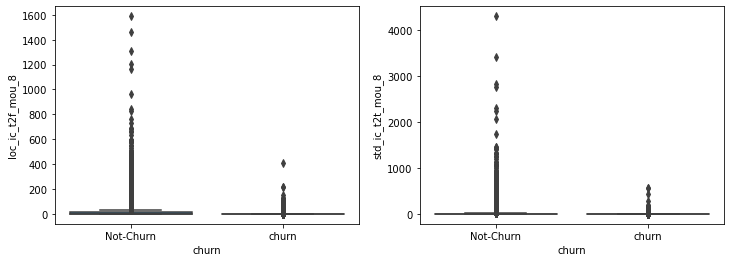

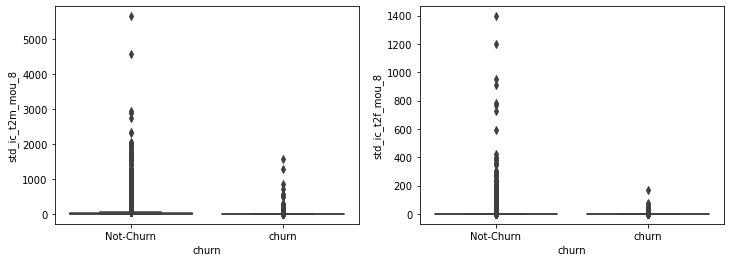

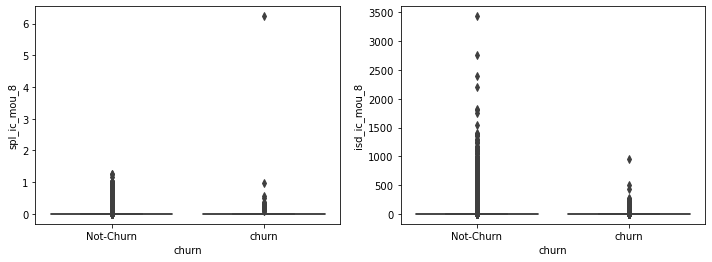

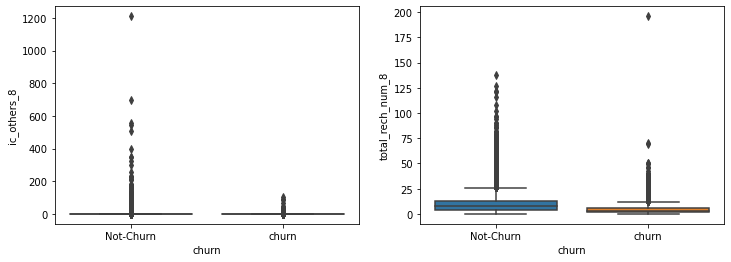

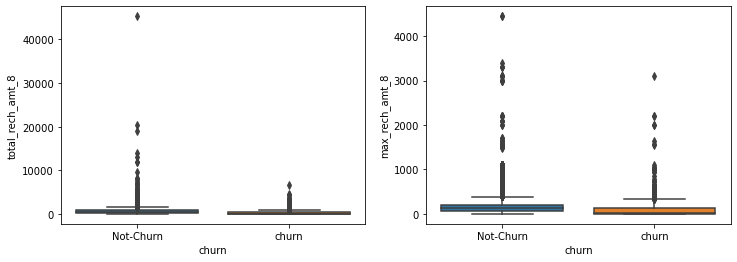

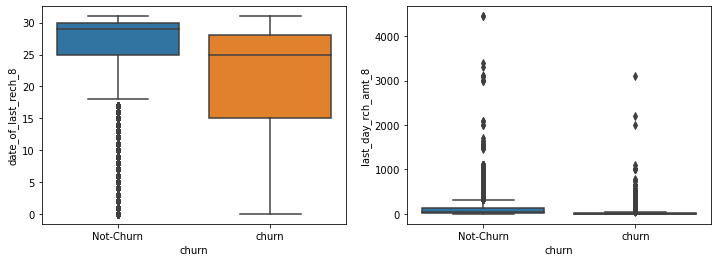

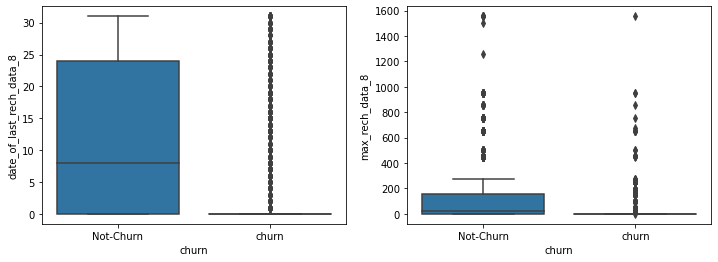

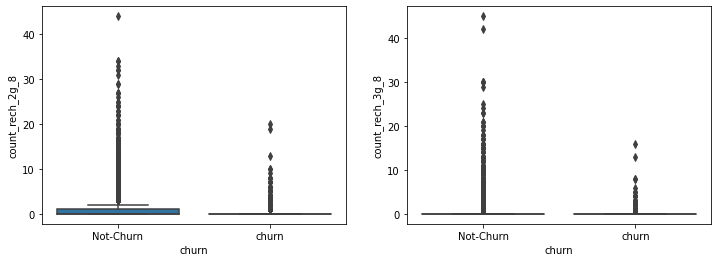

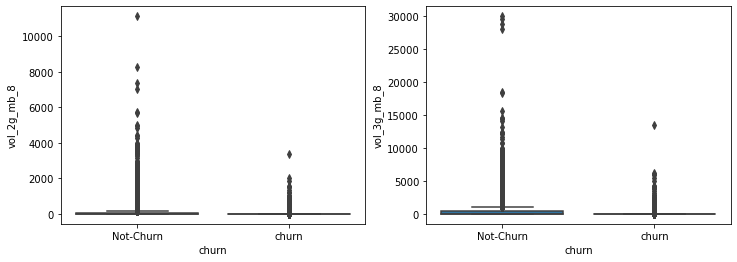

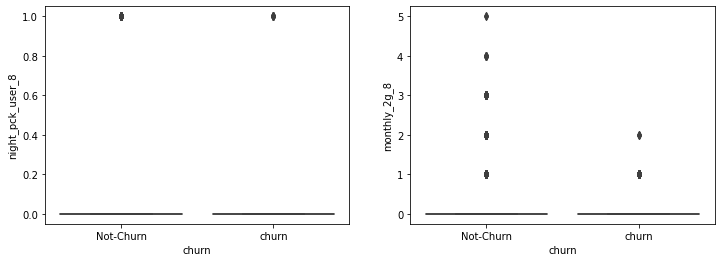

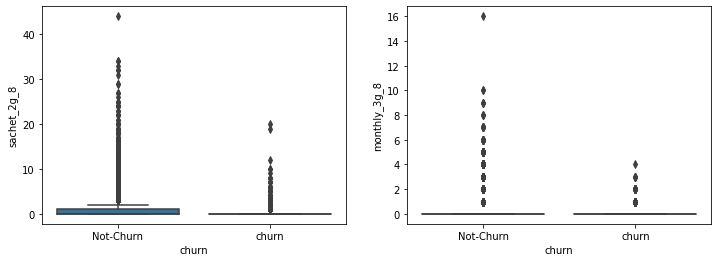

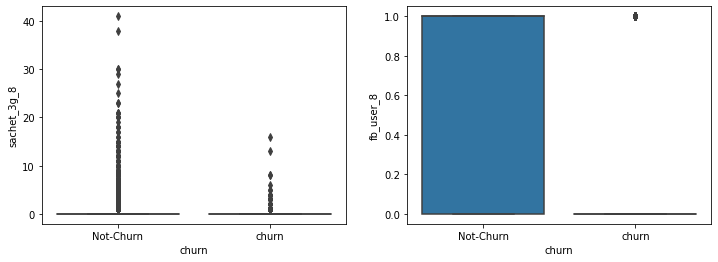

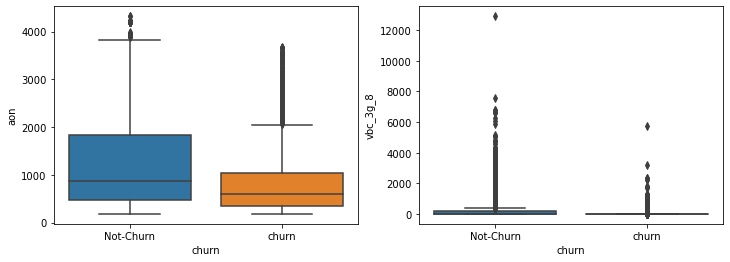

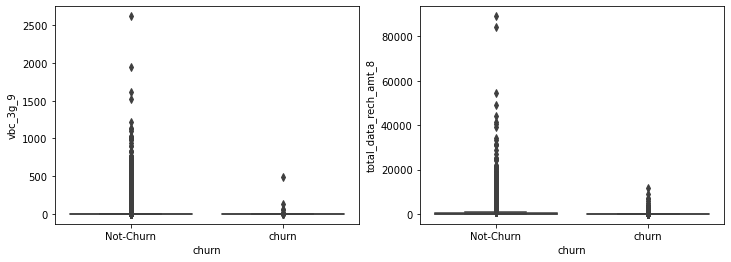

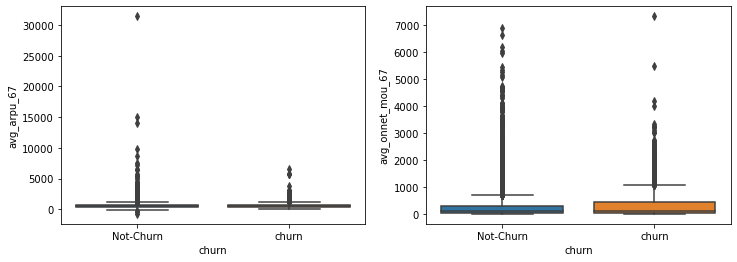

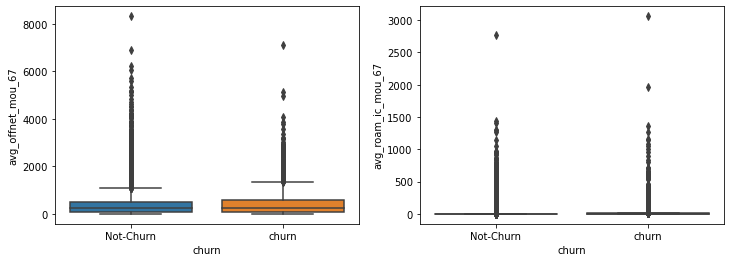

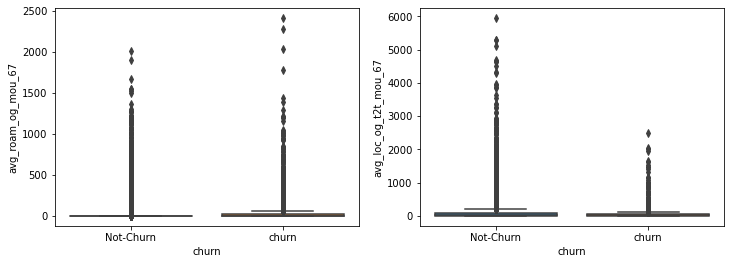

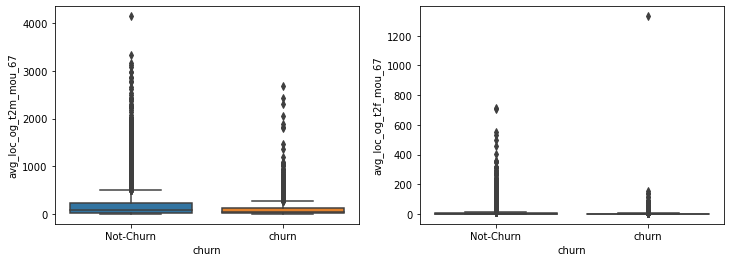

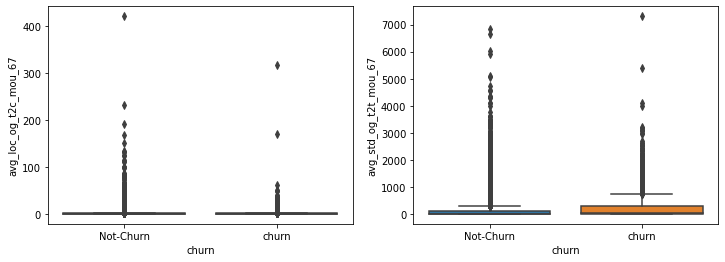

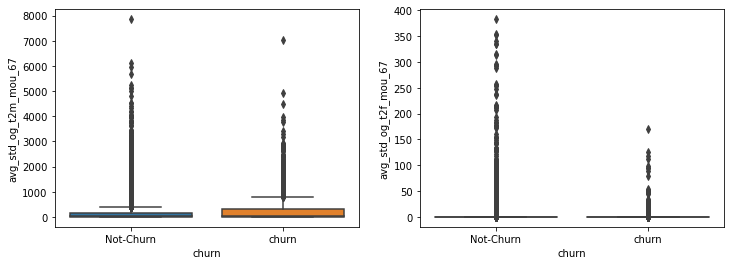

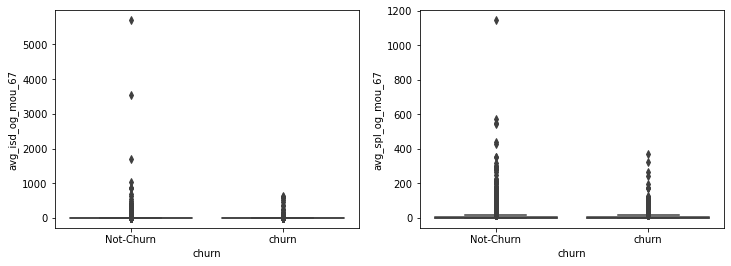

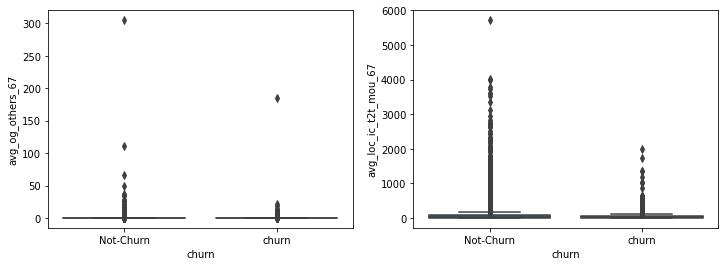

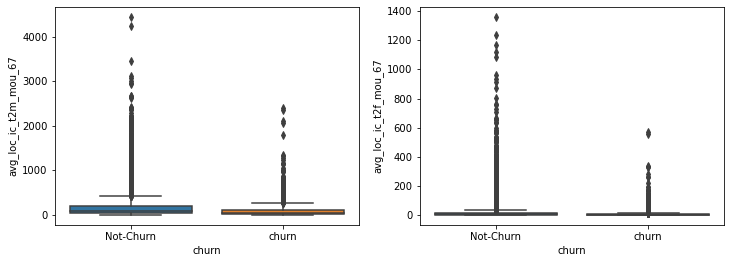

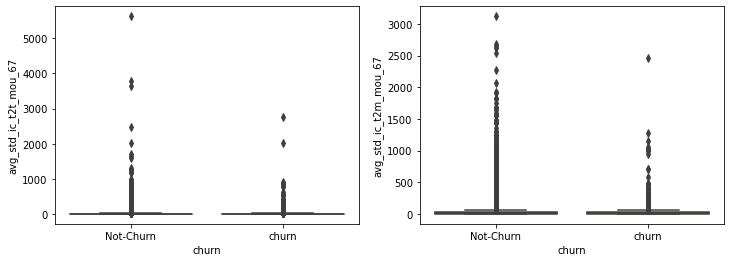

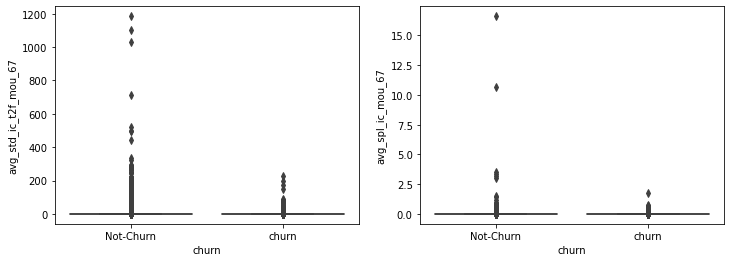

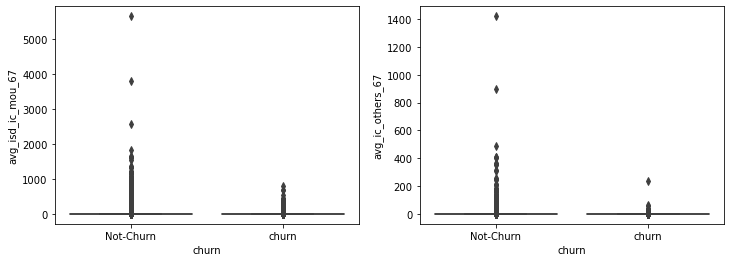

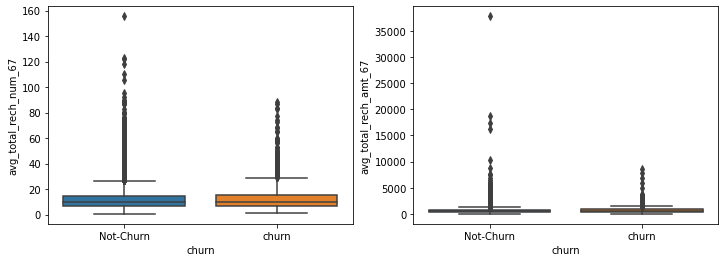

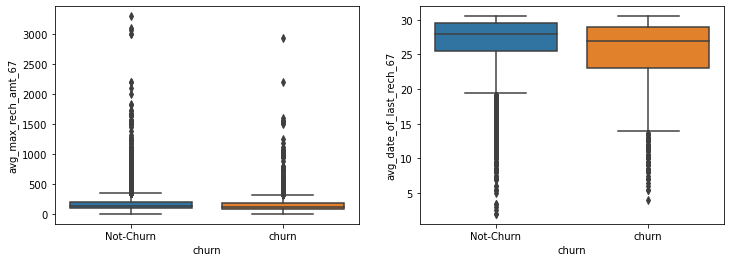

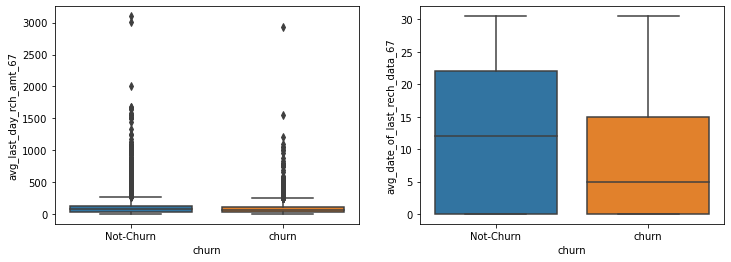

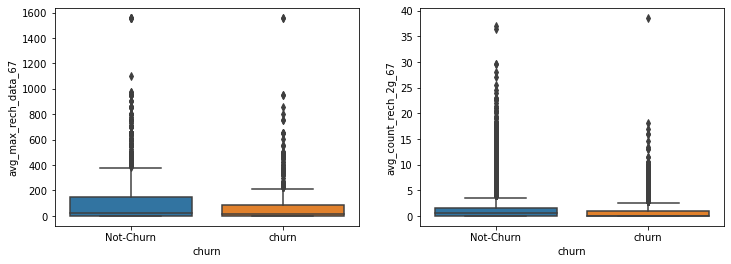

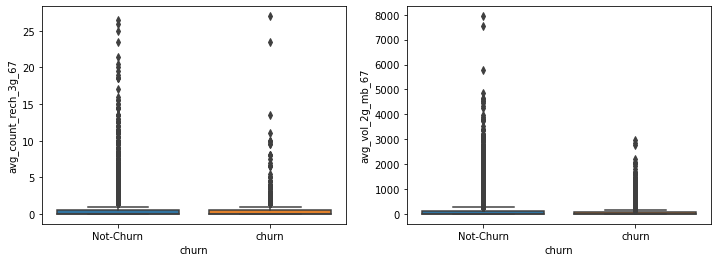

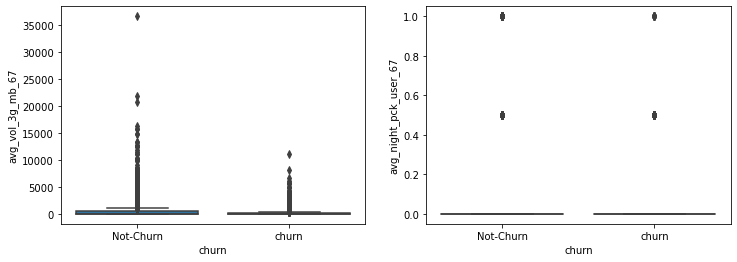

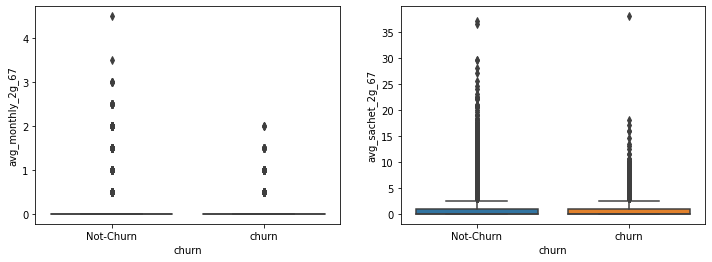

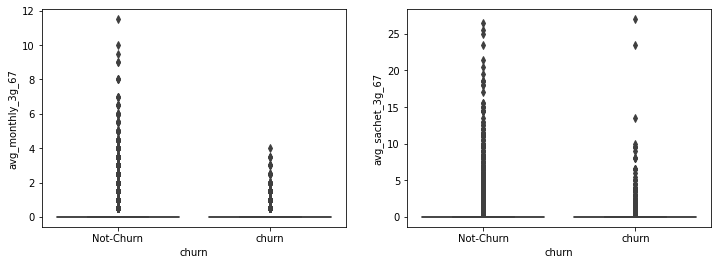

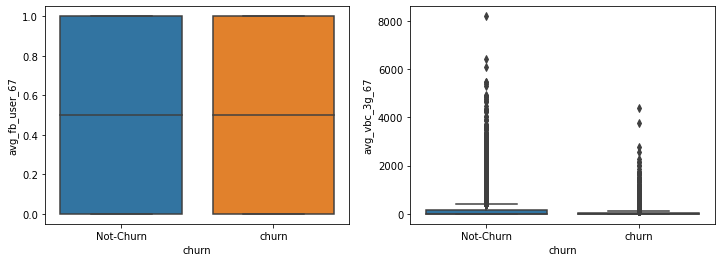

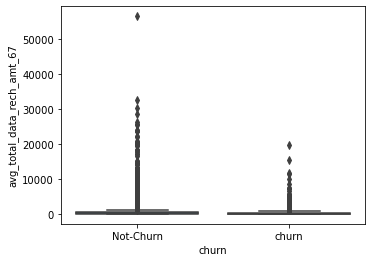

In [75]:
Plot_outliers()

- We can find the outliers in the features and will impute them by using quatiles

In [76]:
#Removing the outliers
Q1=HV_df.quantile(0.05)
Q3=HV_df.quantile(0.95)
IQR=Q3-Q1
HV_df=HV_df[~((HV_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [77]:
HV_df.shape

(18434, 90)

# Step 4: Modelling

In [331]:
df=HV_df.copy()
df.drop('mobile_number',inplace=True,axis=1)

## Scalling of the variables (Using Standard Scaler)

In [332]:
#Making the X and y variables
X=df.drop(['churn'],axis=1)
y=df['churn']

In [333]:
#Spillting the data into train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [334]:
#Checking the data distribution
X_train.shape, X_test.shape

((12903, 88), (5531, 88))

In [335]:
#Scaling the features
scaler=StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

#Since we need to make it a dataframe again
X_train=pd.DataFrame(data=scaled_data_train,index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(data=scaled_data_test,index=X_test.index,columns=X_test.columns)

In [336]:
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)


In [337]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_9,total_data_rech_amt_8,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_date_of_last_rech_67,avg_last_day_rch_amt_67,avg_date_of_last_rech_data_67,avg_max_rech_data_67,avg_count_rech_2g_67,avg_count_rech_3g_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,avg_vbc_3g_67,avg_total_data_rech_amt_67
79134,0.116715,1.576885,1.092587,0.0,0.0,-0.037276,-0.155119,0.000000,0.000000,4.471414,4.546277,0.000000,0.0,0.057082,0.0,0.274341,-0.282480,-0.133896,0.161017,0.223499,0.0,0.0,0.000000,0.000000,0.125,0.128540,0.000000,0.2,-0.276923,-0.090909,-0.111842,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.008190,0.000000,0.000000,-0.067460,-0.140100,-0.159006,1.716969,0.000000,0.000000,-0.283584,-0.286429,-0.107903,0.577143,0.184691,4.750713,0.000000,0.0,-0.149873,0.000000,-0.353772,-0.324854,-0.184426,0.039086,0.532915,0.000000,0.000000,0.000000,0.0,0.071429,-0.145509,-0.117647,0.375,0.111111,-0.547619,-0.172414,-0.333333,0.0,-0.04860,0.000000,0.0,0.0,0.0,0.0,0.0,-0.5,0.000000,-0.335878
54436,0.639494,1.447546,0.490984,0.0,0.0,3.761917,0.833128,0.000000,2.656826,1.321593,1.047016,0.000000,0.0,2.414376,0.0,2.840480,1.151383,-0.133896,3.949153,2.333972,0.0,0.0,0.000000,0.000000,0.500,0.551198,1.153846,0.6,-0.276923,1.318182,0.888158,4.0,1.94078,6.129323,0.893862,0.0,0.0,4.0,0.0,3.23197,1.0,2.127764,3.441879,0.000000,7.333333,-0.092396,0.716651,0.299665,0.000000,0.000000,3.323203,0.910090,-0.107903,1.691429,0.254248,0.452986,0.000000,0.0,0.102456,0.615805,2.341160,1.418393,-0.135758,1.642266,-0.143950,0.000000,0.000000,0.525551,0.0,-0.071429,0.288048,0.941176,0.500,0.611111,0.880952,-0.013793,1.666667,0.0,2.19725,0.321493,0.0,0.0,3.0,0.0,0.0,0.5,1.529698,0.316249
53673,-0.007677,1.166175,0.224492,0.0,0.0,0.542300,0.596665,4.612903,0.164552,3.001404,0.466285,2.903972,0.0,0.078224,0.0,0.514724,0.256032,0.874548,13.101695,7.118774,0.0,0.0,0.719041,0.000000,-0.500,0.235294,3.355769,0.6,3.407692,1.318182,0.190789,1.0,0.00000,0.077733,0.317138,0.0,0.0,1.0,0.0,0.00000,1.0,0.855856,0.814092,6.759726,0.115079,0.031532,1.982453,0.020478,0.000000,0.000000,0.080206,0.376384,0.860182,0.000000,3.888707,0.292251,3.589576,0.0,-0.235394,0.000000,0.123194,0.533987,1.107582,15.375290,9.833229,9.114754,0.000000,4.861744,26.4,-0.571429,0.408315,3.976471,-0.250,2.361111,-0.547619,-0.172414,-0.333333,0.0,-0.04860,0.000000,0.0,0.0,0.0,0.0,0.0,-0.5,0.120144,-0.335878
49036,0.739508,0.164738,1.650879,0.0,0.0,0.085373,-0.271351,0.528226,0.000000,0.806406,6.519490,0.000000,0.0,1.473573,0.0,-0.063118,-0.231177,-0.127865,4.391949,9.189017,0.0,0.0,1.035799,0.031572,1.875,0.718954,-0.576923,0.4,0.153846,1.272727,0.256579,7.0,0.00000,14.864777,3.564173,0.0,0.0,7.0,0.0,0.00000,1.0,0.194103,2.525531,1.440455,5.654762,0.768449,-0.027312,1.913263,0.000000,0.0

## Handeling the Data Imbalance of the data using SMOTE (Synthetic Minority class Oversampling Technique)

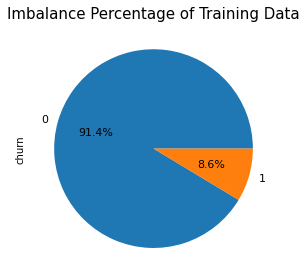

In [338]:
y_train.value_counts().plot.pie(fontsize=11,autopct='%1.1f%%')
plt.title('Imbalance Percentage of Training Data',fontdict={"fontsize":15})
plt.tight_layout()

In [339]:
smote=SMOTE(k_neighbors=5)
X_train_bal,y_train_bal=smote.fit_sample(X_train,y_train)

In [340]:
#Checking the shape of the balance dataset after peforming SMOTE
print("X_train_bal",X_train_bal.shape)
print("y_train_bal",y_train_bal.shape)

X_train_bal (23578, 88)
y_train_bal (23578,)


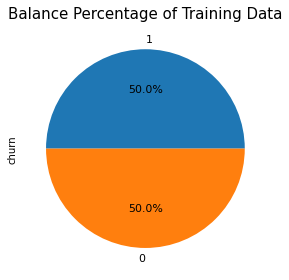

In [341]:
y_train_bal.value_counts().plot.pie(fontsize=11,autopct='%1.1f%%')
plt.title('Balance Percentage of Training Data',fontdict={"fontsize":15})
plt.tight_layout()

## Step 4.1 Basic Logistic Regression (Default Parameters)

In [342]:
#Making an object and fitting the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal,y_train_bal)

LogisticRegression(random_state=42)

In [343]:
#Evaluating the performance of the train set
y_train_pred_logreg=logreg.predict(X_train_bal)

In [344]:
print("Logistic Regression Train Set Default Parameters")
print("="*25)
print("Accuracy:\t",accuracy_score(y_train_bal,y_train_pred_logreg).round(3))
print("Precision:\t", precision_score(y_train_bal, y_train_pred_logreg).round(3))
print("Recall:\t\t",recall_score(y_train_bal, y_train_pred_logreg).round(3))
print("ROC AUC:\t", roc_auc_score(y_train_bal, y_train_pred_logreg).round(3))

Logistic Regression Train Set Default Parameters
Accuracy:	 0.871
Precision:	 0.865
Recall:		 0.878
ROC AUC:	 0.871


- from the above metrics we can say that our model is performing well.

In [345]:
#Evaluating the performance of the test set
y_test_pred_logreg=logreg.predict(X_test)

In [346]:
print("Logistic Regression Test Set")
print("="*25)
print("Accuracy:\t",accuracy_score(y_test,y_test_pred_logreg).round(3))
print("Precision:\t", precision_score(y_test, y_test_pred_logreg).round(3))
print("Recall:\t\t",recall_score(y_test, y_test_pred_logreg).round(3))
print("ROC AUC:\t", roc_auc_score(y_test, y_test_pred_logreg).round(3))

Logistic Regression Test Set
Accuracy:	 0.856
Precision:	 0.363
Recall:		 0.81
ROC AUC:	 0.835


In [347]:
print(classification_report(y_test,y_test_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      5037
           1       0.36      0.81      0.50       494

    accuracy                           0.86      5531
   macro avg       0.67      0.84      0.71      5531
weighted avg       0.92      0.86      0.88      5531



In [348]:
model_performances = pd.DataFrame({"Method":["Basic Logistic Regression"],
                                    "Accuracy" : [accuracy_score(y_test,y_test_pred_logreg).round(3)],
                                    "Precision":[ precision_score(y_test, y_test_pred_logreg).round(3)],
                                    "Recall":[recall_score(y_test, y_test_pred_logreg).round(3)],
                                    "ROC-AUC":[roc_auc_score(y_test, y_test_pred_logreg).round(3)]})
model_performances=model_performances[["Method","Accuracy","Precision","Recall","ROC-AUC"]]
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.81,0.835


## Feature Selection using RFECV

In [349]:
rfecv=RFECV(estimator=logreg,cv=4)

In [350]:
rfecv.fit(X_train_bal,y_train_bal)

RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [351]:
rfecv.grid_scores_

array([0.74480453, 0.7859872 , 0.80265524, 0.81249521, 0.81728761,
       0.82547334, 0.83298038, 0.83620378, 0.8365006 , 0.83921484,
       0.84243792, 0.84672163, 0.84731536, 0.85278658, 0.85550124,
       0.85584067, 0.85914871, 0.85986963, 0.86076026, 0.86126914,
       0.86237189, 0.86326256, 0.86364426, 0.86440773, 0.86483186,
       0.86428048, 0.86415327, 0.86419567, 0.86457734, 0.86521364,
       0.86534085, 0.86589221, 0.86623149, 0.86635877, 0.8667829 ,
       0.86703732, 0.86775834, 0.86797043, 0.86775842, 0.86703741,
       0.86729184, 0.86826738, 0.86847944, 0.8687339 , 0.86894596,
       0.86903074, 0.86920041, 0.86941242, 0.86886107, 0.86928521,
       0.86937005, 0.87034547, 0.87021827, 0.87013345, 0.86992144,
       0.87038794, 0.87030309, 0.87043032, 0.87030308, 0.87017594,
       0.87026074, 0.87034556, 0.87030315, 0.87038798, 0.87030314,
       0.8705152 , 0.87102417, 0.87136343, 0.87149064, 0.87182997,
       0.87157551, 0.87157556, 0.87182997, 0.87199962, 0.87178

In [352]:
num_features=X_train.shape
num_features[1]

88

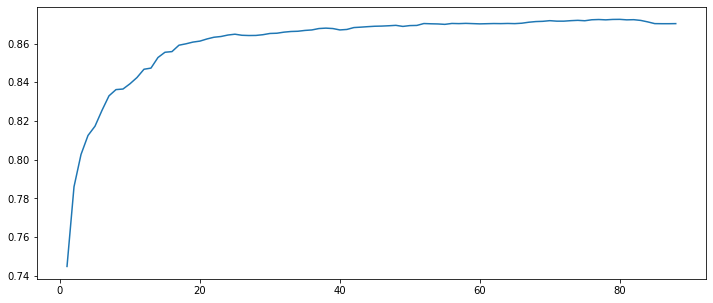

In [353]:
plt.figure(figsize=[12,5])
plt.plot(range(1,num_features[1]+1),rfecv.grid_scores_)
plt.show()

In [354]:
rfecv.n_features_

80

In [355]:
rfecv.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

## Step 4.2 Basic Decision Trees

In [356]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal,y_train_bal)

DecisionTreeClassifier(random_state=42)

In [357]:
y_train_pred_dt=dt.predict(X_train_bal)

In [358]:
print("Decision Tree Train Set Default Parameters")
print("="*25)
print("Accuracy:\t",accuracy_score(y_train_bal,y_train_pred_dt).round(3))
print("Precision:\t", precision_score(y_train_bal, y_train_pred_dt).round(3))
print("Recall:\t\t",recall_score(y_train_bal, y_train_pred_dt).round(3))
print("ROC AUC:\t", roc_auc_score(y_train_bal, y_train_pred_dt).round(3))

Decision Tree Train Set Default Parameters
Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
ROC AUC:	 1.0


In [359]:
y_test_pred_dt=dt.predict(X_test)

In [360]:
print("Decision Tree Test Set on Default Parameters")
print("="*25)
print("Accuracy:\t",accuracy_score(y_test,y_test_pred_dt).round(3))
print("Precision:\t", precision_score(y_test, y_test_pred_dt).round(3))
print("Recall:\t\t",recall_score(y_test, y_test_pred_dt).round(3))
print("ROC AUC:\t", roc_auc_score(y_test, y_test_pred_dt).round(3))

Decision Tree Test Set on Default Parameters
Accuracy:	 0.892
Precision:	 0.427
Recall:		 0.611
ROC AUC:	 0.765


In [361]:
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5037
           1       0.43      0.61      0.50       494

    accuracy                           0.89      5531
   macro avg       0.69      0.77      0.72      5531
weighted avg       0.91      0.89      0.90      5531



In [362]:
temp_model_performances = pd.DataFrame({"Method":["Basic Decision Tree Default Parameters"],
                                    "Accuracy" : [accuracy_score(y_test,y_test_pred_dt).round(3)],
                                    "Precision":[ precision_score(y_test, y_test_pred_dt).round(3)],
                                    "Recall":[recall_score(y_test, y_test_pred_dt).round(3)],
                                    "ROC-AUC":[roc_auc_score(y_test, y_test_pred_dt).round(3)]})
model_performances=pd.concat([model_performances,temp_model_performances])
model_performances=model_performances[["Method","Accuracy","Precision","Recall","ROC-AUC"]]
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.810,0.835
0,Basic Decision Tree Default Parameters,0.892,0.427,0.611,0.765


## Hyper parameter Tuning using Randomized grid search CV

In [363]:
#Defining the hyper parameters
hyper_params_dt={
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,500],
    'max_features': [3, 5, 7, 11, 15]}

In [364]:
model_cv_dt=RandomizedSearchCV(
    estimator=dt,
    param_distributions=hyper_params_dt,
    cv=5,
    verbose=1,
    return_train_score=True,
    n_jobs=-1,
    n_iter=50)

In [365]:
model_cv_dt.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    5.4s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': [3, 5, 7, 11, 15],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             500]},
                   return_train_score=True, verbose=1)

In [366]:
model_cv_dt.best_score_

0.9054214303510444

In [367]:
model_cv_dt.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features=15, min_samples_leaf=10,
                       random_state=42)

In [368]:
cv_df=pd.DataFrame(model_cv_dt.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091752,0.011734,0.011969,0.010998,500,5,5,"{'min_samples_leaf': 500, 'max_features': 5, '...",0.786047,0.786047,0.802375,0.790032,0.794486,0.791797,0.006138,34,0.804634,0.796151,0.800286,0.801304,0.790171,0.798509,0.004971
1,0.201660,0.025414,0.011171,0.003302,100,11,10,"{'min_samples_leaf': 100, 'max_features': 11, ...",0.842027,0.886344,0.879347,0.876988,0.862778,0.869497,0.015727,15,0.894815,0.880872,0.882462,0.880666,0.874940,0.882751,0.006550
2,0.097737,0.007698,0.022140,0.007447,100,15,2,"{'min_samples_leaf': 100, 'max_features': 15, ...",0.780534,0.790076,0.803223,0.798303,0.809756,0.796379,0.010201,32,0.803149,0.796363,0.799067,0.802576,0.796109,0.799453,0.002977
3,0.095743,0.013275,0.009175,0.001596,500,5,3,"{'min_samples_leaf': 500, 'max_features': 5, '...",0.743427,0.763147,0.763783,0.763097,0.758643,0.758419,0.007718,38,0.762008,0.760471,0.764659,0.764194,0.758840,0.762035,0.002200
4,0.222804,0.027309,0.012167,0.002309,5,7,20,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.862171,0.904580,0.906913,0.904560,0.910074,0.897660,0.017859,4,0.955360,0.952762,0.949528,0.949001,0.952977,0.951926,0.002362


In [369]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
21,0.361261,0.022830,0.003124,0.006247,10,15,20,"{'min_samples_leaf': 10, 'max_features': 15, '...",0.865352,0.914122,0.910305,0.921739,0.915589,0.905421,0.020370,1,0.947832,0.942000,0.941576,0.942215,0.940996,0.942924,0.002489
36,0.249945,0.017110,0.009372,0.007652,10,15,10,"{'min_samples_leaf': 10, 'max_features': 15, '...",0.875954,0.911366,0.910093,0.916225,0.912619,0.905251,0.014791,2,0.931980,0.934949,0.927526,0.933521,0.928749,0.931345,0.002809
23,0.196798,0.006798,0.006248,0.007653,5,11,10,"{'min_samples_leaf': 5, 'max_features': 11, 'm...",0.862807,0.912638,0.900339,0.916649,0.903287,0.899144,0.019118,3,0.936592,0.925459,0.922225,0.934369,0.924667,0.928662,0.005712
4,0.222804,0.027309,0.012167,0.002309,5,7,20,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.862171,0.904580,0.906913,0.904560,0.910074,0.897660,0.017859,4,0.955360,0.952762,0.949528,0.949001,0.952977,0.951926,0.002362
42,0.250465,0.003818,0.001046,0.002092,20,11,20,"{'min_samples_leaf': 20, 'max_features': 11, '...",0.860475,0.903944,0.913274,0.900106,0.909650,0.897490,0.019056,5,0.921323,0.915597,0.921323,0.915549,0.921274,0.919013,0.002809


In [370]:
needed_cols = ['param_max_depth','param_max_features','param_min_samples_leaf', 'rank_test_score',  'mean_test_score']

In [371]:
cv_df.sort_values(by='rank_test_score')[needed_cols].head()

,param_max_depth,param_max_features,param_min_samples_leaf,rank_test_score,mean_test_score
21,20,15,10,1,0.905421
36,10,15,10,2,0.905251
23,10,11,5,3,0.899144
4,20,7,5,4,0.897660
42,20,11,20,5,0.897490


## Plotting the mean and median for param_max_depth

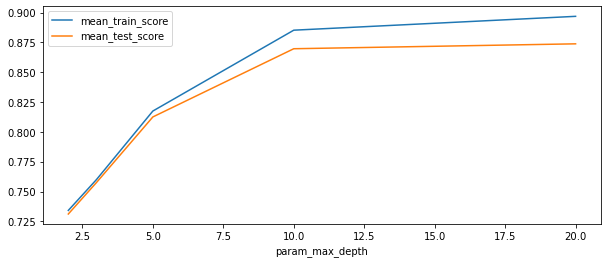

In [372]:
cv_df.groupby('param_max_depth')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

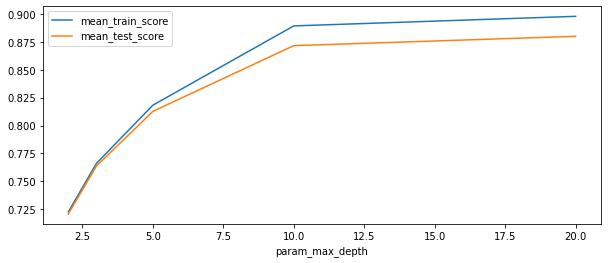

In [373]:
cv_df.groupby('param_max_depth')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Plotting the mean and median for param_max_features

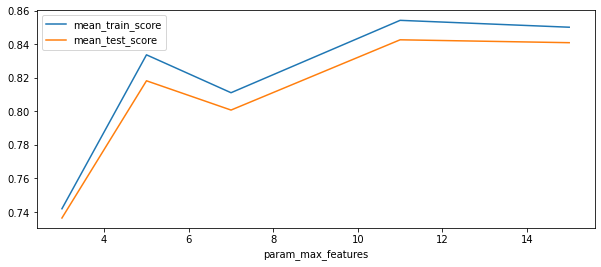

In [374]:
cv_df.groupby('param_max_features')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

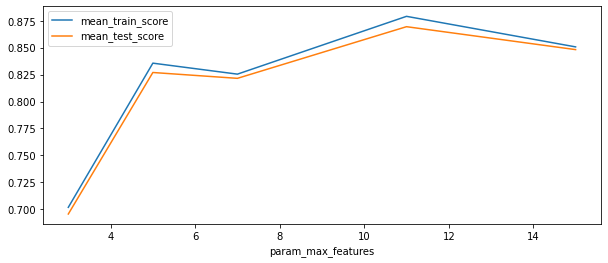

In [375]:
cv_df.groupby('param_max_features')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Plotting the mean and median for param_min_samples_leaf

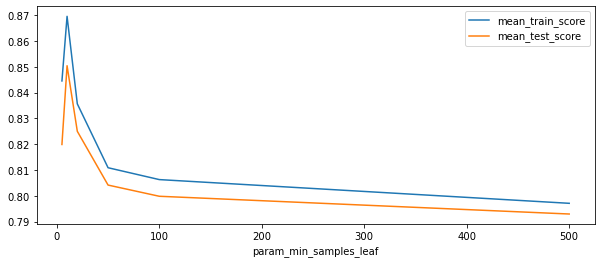

In [376]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

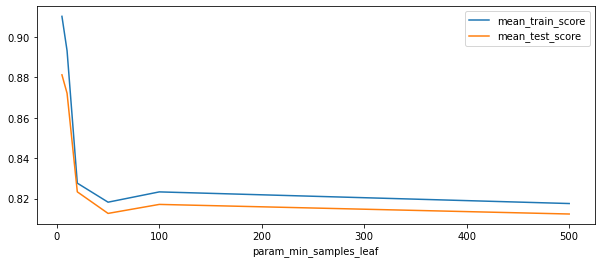

In [377]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Fine tuning the parameters

In [378]:
hyper_params_dt_ft={
     'max_depth': [10,15,20,25],
    'min_samples_leaf': [5,10,20,50],
    'max_features': [10,12,14,16]
}

In [379]:
model_cv_dt2=RandomizedSearchCV(
    estimator=dt,
    param_distributions=hyper_params_dt_ft,
    cv=5,
    verbose=1,
    return_train_score=True,
    n_jobs=-1,
    n_iter=50)

In [380]:
model_cv_dt2.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.0s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25],
                                        'max_features': [10, 12, 14, 16],
                                        'min_samples_leaf': [5, 10, 20, 50]},
                   return_train_score=True, verbose=1)

In [381]:
model_cv_dt2.best_score_

0.9122916953364688

In [382]:
model_cv_dt2.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features=12, min_samples_leaf=5,
                       random_state=42)

## Extracting the best parameters and testing the performance on the test data

In [383]:
dt_best=model_cv_dt2.best_estimator_

In [384]:
y_test_pred_dt_ft=dt_best.predict(X_test)

In [385]:
print("Decision Tree Post hyperparameter Tuning Test Set")
print("="*25)
print("Accuracy:\t",accuracy_score(y_test,y_test_pred_dt_ft).round(3))
print("Precision:\t", precision_score(y_test, y_test_pred_dt_ft).round(3))
print("Recall:\t\t",recall_score(y_test, y_test_pred_dt_ft).round(3))
print("ROC AUC:\t", roc_auc_score(y_test, y_test_pred_dt_ft).round(3))

Decision Tree Post hyperparameter Tuning Test Set
Accuracy:	 0.891
Precision:	 0.43
Recall:		 0.678
ROC AUC:	 0.795


In [386]:
print(classification_report(y_test,y_test_pred_dt_ft))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5037
           1       0.43      0.68      0.53       494

    accuracy                           0.89      5531
   macro avg       0.70      0.79      0.73      5531
weighted avg       0.92      0.89      0.90      5531



In [387]:
temp_model_performances = pd.DataFrame({"Method":["Decision Tree After Hyper-parameters Tuning"],
                                    "Accuracy" : [accuracy_score(y_test,y_test_pred_dt_ft).round(3)],
                                    "Precision":[ precision_score(y_test, y_test_pred_dt_ft).round(3)],
                                    "Recall":[recall_score(y_test, y_test_pred_dt_ft).round(3)],
                                    "ROC-AUC":[roc_auc_score(y_test, y_test_pred_dt_ft).round(3)]})
model_performances=pd.concat([model_performances,temp_model_performances])
model_performances=model_performances[["Method","Accuracy","Precision","Recall","ROC-AUC"]]
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.810,0.835
0,Basic Decision Tree Default Parameters,0.892,0.427,0.611,0.765
0,Decision Tree After Hyper-parameters Tuning,0.891,0.430,0.678,0.795


## Step 4.3 Basic Random Forest Classifier

In [388]:
rf=RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)

In [389]:
rf.fit(X_train_bal,y_train_bal)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [390]:
y_train_pred_rf=rf.predict(X_train_bal)

In [391]:
print("Random Forest Train Set Default Paranmters")
print("="*25)
print("Accuracy:\t",accuracy_score(y_train_bal,y_train_pred_rf).round(3))
print("Precision:\t", precision_score(y_train_bal, y_train_pred_rf).round(3))
print("Recall:\t\t",recall_score(y_train_bal, y_train_pred_rf).round(3))
print("ROC AUC:\t", roc_auc_score(y_train_bal, y_train_pred_rf).round(3))

Random Forest Train Set Default Paranmters
Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
ROC AUC:	 1.0


In [392]:
y_test_pred_rf=rf.predict(X_test)

In [393]:
print("Random Forest Train Set")
print("="*25)
print("Accuracy:\t",accuracy_score(y_test,y_test_pred_rf).round(3))
print("Precision:\t", precision_score(y_test, y_test_pred_rf).round(3))
print("Recall:\t\t",recall_score(y_test, y_test_pred_rf).round(3))
print("ROC AUC:\t", roc_auc_score(y_test, y_test_pred_rf).round(3))

Random Forest Train Set
Accuracy:	 0.934
Precision:	 0.621
Recall:		 0.68
ROC AUC:	 0.82


In [394]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5037
           1       0.62      0.68      0.65       494

    accuracy                           0.93      5531
   macro avg       0.79      0.82      0.81      5531
weighted avg       0.94      0.93      0.94      5531



In [395]:
temp_model_performances = pd.DataFrame({"Method":["Basic Random Forest Default Parameters"],
                                    "Accuracy" : [accuracy_score(y_test,y_test_pred_rf).round(3)],
                                    "Precision":[ precision_score(y_test, y_test_pred_rf).round(3)],
                                    "Recall":[recall_score(y_test, y_test_pred_rf).round(3)],
                                    "ROC-AUC":[roc_auc_score(y_test, y_test_pred_rf).round(3)]})
model_performances=pd.concat([model_performances,temp_model_performances])
model_performances=model_performances[["Method","Accuracy","Precision","Recall","ROC-AUC"]]
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.810,0.835
0,Basic Decision Tree Default Parameters,0.892,0.427,0.611,0.765
0,Decision Tree After Hyper-parameters Tuning,0.891,0.430,0.678,0.795
0,Basic Random Forest Default Parameters,0.934,0.621,0.680,0.820


## Hyper-parameter Tuning of Random Forest using Randomized Cross Validation

In [396]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1,oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [397]:
hyper_params={  'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]}

In [398]:
model_cv=RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    cv=5,
    verbose=1,
    return_train_score=True,
    n_jobs=-1,
    n_iter=50)

In [399]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20],
                                        'max_features': [3, 5, 7, 11, 15],
                                        'min_samples_leaf': [20, 50, 100, 200,
                                                             400],
                                        'n_estimators': [10, 25, 50, 80, 100]},
                   return_train_score=True, verbose=1)

In [400]:
model_cv.best_score_

0.9410213275907122

In [401]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=20,
                       n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=42)

In [402]:
cv_df=pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.596060,0.139577,0.080996,0.014395,80,20,5,3,"{'n_estimators': 80, 'min_samples_leaf': 20, '...",0.937234,0.932584,0.930647,0.931395,0.934109,0.933194,0.002334,36,0.935284,0.934799,0.932668,0.932868,0.933934,0.933911,0.001030
1,1.795140,0.271949,0.170155,0.080203,80,400,11,3,"{'n_estimators': 80, 'min_samples_leaf': 400, ...",0.939558,0.933359,0.929097,0.934109,0.934884,0.934201,0.003345,31,0.933637,0.937125,0.931796,0.935678,0.936840,0.935015,0.002024
2,0.360641,0.113438,0.161977,0.111961,10,50,5,15,"{'n_estimators': 10, 'min_samples_leaf': 50, '...",0.942270,0.936459,0.943045,0.937597,0.932558,0.938386,0.003876,25,0.940903,0.943228,0.938965,0.940327,0.939359,0.940556,0.001502
3,0.969712,0.048726,0.053110,0.015934,50,50,5,5,"{'n_estimators': 50, 'min_samples_leaf': 50, '...",0.942658,0.933747,0.942658,0.941085,0.935659,0.939161,0.003735,16,0.939740,0.942162,0.940419,0.940231,0.941490,0.940808,0.000886
4,0.420616,0.044918,0.366557,0.384920,25,400,3,3,"{'n_estimators': 25, 'min_samples_leaf': 400, ...",0.913599,0.913599,0.913599,0.913953,0.913566,0.913664,0.000146,44,0.913680,0.913680,0.913680,0.913591,0.913688,0.913663,0.000036


In [403]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_leaf', 'param_max_features',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [404]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
22,3.766828,0.645777,0.407194,0.254913,80,20,11,10,"{'n_estimators': 80, 'min_samples_leaf': 20, '...",0.943820,0.936459,0.944595,0.942248,0.937984,0.941021,0.003230,1,0.944197,0.946425,0.945069,0.945462,0.945558,0.945342,0.000724
7,1.988692,0.456111,0.592481,0.294653,50,20,11,10,"{'n_estimators': 50, 'min_samples_leaf': 20, '...",0.944208,0.935684,0.943433,0.942636,0.937597,0.940711,0.003415,2,0.944584,0.946425,0.944875,0.945752,0.945558,0.945439,0.000653
48,2.784003,0.183003,0.214402,0.106983,100,20,3,15,"{'n_estimators': 100, 'min_samples_leaf': 20, ...",0.944208,0.934522,0.943820,0.942248,0.937984,0.940556,0.003738,3,0.942647,0.944197,0.942841,0.942943,0.943912,0.943308,0.000623
9,3.671791,0.355373,0.395829,0.174091,100,20,7,20,"{'n_estimators': 100, 'min_samples_leaf': 20, ...",0.944208,0.935684,0.944208,0.942248,0.936434,0.940556,0.003749,4,0.944100,0.945941,0.944294,0.944105,0.945558,0.944800,0.000788
17,3.162644,0.379665,0.110569,0.041803,80,20,7,15,"{'n_estimators': 80, 'min_samples_leaf': 20, '...",0.945757,0.934909,0.943820,0.941473,0.936822,0.940556,0.004108,5,0.944003,0.945553,0.944197,0.944783,0.945558,0.944819,0.000654


In [405]:
needed_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 
               'rank_test_score', 'mean_test_score']

In [406]:
cv_df.sort_values('rank_test_score')[needed_cols].head()

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
22,10,11,20,80,1,0.941021
7,10,11,20,50,2,0.940711
48,15,3,20,100,3,0.940556
9,20,7,20,100,4,0.940556
17,15,7,20,80,5,0.940556


## Plotting the mean and median for param_max_depth

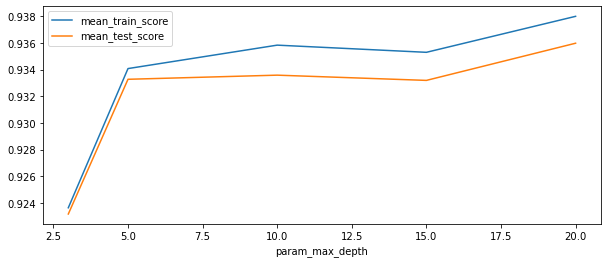

In [407]:
cv_df.groupby('param_max_depth')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

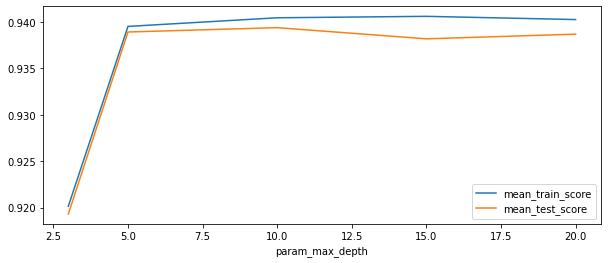

In [408]:
cv_df.groupby('param_max_depth')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Plotting the mean and median for param_max_features

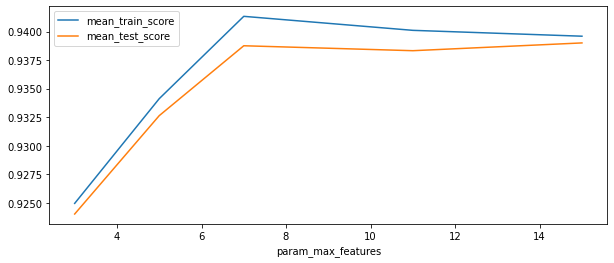

In [409]:
cv_df.groupby('param_max_features')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

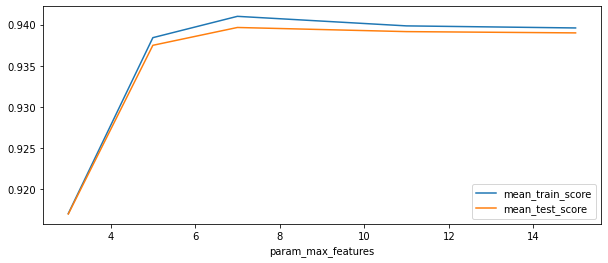

In [410]:
cv_df.groupby('param_max_features')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Plotting the mean and median for param_min_samples_leaf

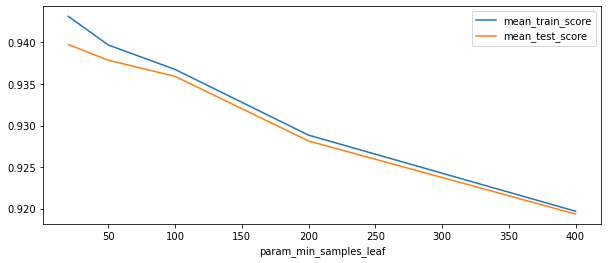

In [411]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

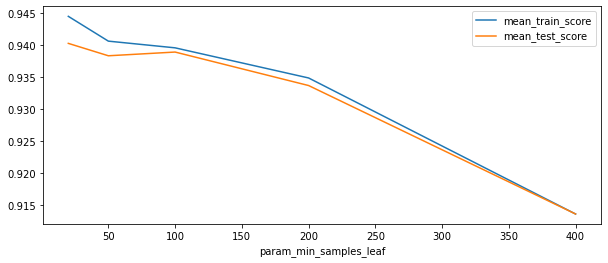

In [412]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Plotting the mean and median for param_min_samples_leaf


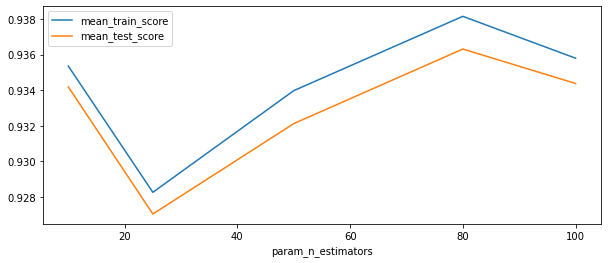

In [413]:
cv_df.groupby('param_n_estimators')['mean_train_score','mean_test_score'].mean().plot(figsize=[10,4])
plt.show()

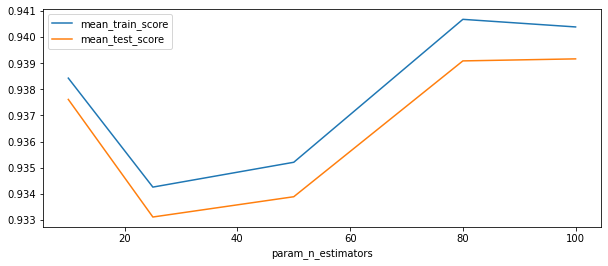

In [414]:
cv_df.groupby('param_n_estimators')['mean_train_score','mean_test_score'].agg(np.median).plot(figsize=[10,4])
plt.show()

## Fine tuning the hyper parameters


In [415]:
hyper_params_rf_ft={'max_depth': [16,18,20,22],
                'max_features': [14,16,18,20],
                'min_samples_leaf': [5,10,20,50],
                'n_estimators': [80,90,100,110]}
                                     

In [416]:
model_cv2_rf=RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params_rf_ft,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    cv=5,
    n_iter=50)

In [417]:
model_cv2_rf.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 13.7min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [16, 18, 20, 22],
                                        'max_features': [14, 16, 18, 20],
                                        'min_samples_leaf': [5, 10, 20, 50],
                                        'n_estimators': [80, 90, 100, 110]},
                   return_train_score=True, verbose=1)

In [418]:
model_cv2_rf.best_score_

0.9564855094949888

In [419]:
model_cv2_rf.best_estimator_

RandomForestClassifier(max_depth=22, max_features=16, min_samples_leaf=5,
                       n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

## Extracting the best parameters and testing the performance on the test data

In [420]:
rf_best=model_cv2_rf.best_estimator_

In [421]:
rf_best

RandomForestClassifier(max_depth=22, max_features=16, min_samples_leaf=5,
                       n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

In [422]:
y_test_pred_rf_ft=rf_best.predict(X_test)

In [423]:
print("Random Forest Test Set")
print("="*25)
print("Accuracy:\t",accuracy_score(y_test,y_test_pred_rf_ft).round(3))
print("Precision:\t", precision_score(y_test, y_test_pred_rf_ft).round(3))
print("Recall:\t\t",recall_score(y_test, y_test_pred_rf_ft).round(3))
print("ROC AUC:\t", roc_auc_score(y_test, y_test_pred_rf_ft).round(3))

Random Forest Test Set
Accuracy:	 0.93
Precision:	 0.59
Recall:		 0.725
ROC AUC:	 0.838


In [424]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5037
           1       0.62      0.68      0.65       494

    accuracy                           0.93      5531
   macro avg       0.79      0.82      0.81      5531
weighted avg       0.94      0.93      0.94      5531



In [425]:
temp_model_performances = pd.DataFrame({"Method":["Random Forest After Hyper-parameters Tuning"],
                                    "Accuracy" : [accuracy_score(y_test,y_test_pred_rf_ft).round(3)],
                                    "Precision":[ precision_score(y_test, y_test_pred_rf_ft).round(3)],
                                    "Recall":[recall_score(y_test, y_test_pred_rf_ft).round(3)],
                                    "ROC-AUC":[roc_auc_score(y_test, y_test_pred_rf_ft).round(3)]})
model_performances=pd.concat([model_performances,temp_model_performances])
model_performances=model_performances[["Method","Accuracy","Precision","Recall","ROC-AUC"]]
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.810,0.835
0,Basic Decision Tree Default Parameters,0.892,0.427,0.611,0.765
0,Decision Tree After Hyper-parameters Tuning,0.891,0.430,0.678,0.795
0,Basic Random Forest Default Parameters,0.934,0.621,0.680,0.820
0,Random Forest After Hyper-parameters Tuning,0.930,0.590,0.725,0.838


## Top 10 features affecting our churn rate

In [426]:
imp_df = pd.DataFrame({
    "Varname": X_train_bal.columns,
    "Imp": rf_best.feature_importances_
})

In [427]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
25,total_rech_amt_8,0.096029
16,loc_ic_t2m_mou_8,0.087794
4,roam_og_mou_8,0.082828
0,arpu_8,0.072995
27,date_of_last_rech_8,0.069506
26,max_rech_amt_8,0.053956
3,roam_ic_mou_8,0.050243
28,last_day_rch_amt_8,0.037920
40,fb_user_8,0.037329
6,loc_og_t2m_mou_8,0.031231


<Figure size 864x432 with 0 Axes>

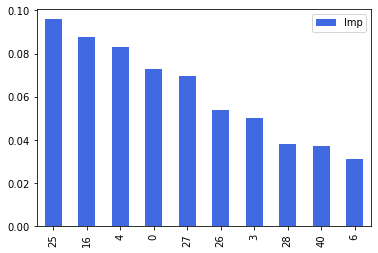

In [428]:
plt.figure(figsize=[12,6])
imp_df.sort_values(by="Imp", ascending=False)[:10].plot(kind='bar',color='royalblue')
plt.show()

## Step 5: Model Evaluation

- We build and trained diffrent predictive models. Lets compare the results of different predictive models.

In [429]:
model_performances

,Method,Accuracy,Precision,Recall,ROC-AUC
0,Basic Logistic Regression,0.856,0.363,0.810,0.835
0,Basic Decision Tree Default Parameters,0.892,0.427,0.611,0.765
0,Decision Tree After Hyper-parameters Tuning,0.891,0.430,0.678,0.795
0,Basic Random Forest Default Parameters,0.934,0.621,0.680,0.820
0,Random Forest After Hyper-parameters Tuning,0.930,0.590,0.725,0.838


### From the above table of results it can be said that the accuracy of the Random Forest with Hyper Parameter Tuning and without parameter tuning are the highest, but the ROC-AUC of the Logistic Regression model and Random Forest post hyper-paramter tuning have the greatest value and hence they both can be used to predict churn data for future dataset by the company.

#### Observations

•The churn for High value customers is less, as it is 8%

•Huge drop is visible in total amount recharge and number of the times customers recharge during the action phase for the churn customers. It seems to be one of the main indicator to churn

•Avg. revenue per user seems to be most important feature in determining churn prediction. In the action phase revenue has reduced.

•Incoming and Outgoing Calls on roaming during Action phase are strong indicators of churn behavior.

•Local Incoming calls from other network operator is also an indicator to churn

•The last day and date  which customer does recharge is also one of the strong indicator for churn

•2G/3G data usage of churned customers are very less during the action phase.

•Customers with more than 6 months of tenure are more likely to churn

#### Recommendations

•Telecom operator need to work on 2G/3G coverage area. Operator need to provide better coverage.

•Service provider need to work on roaming free option for churned customers like unlimited incoming/outgoing calls while roaming

•Operator can increase limit of free minutes per day

•Operator can come up with carry forward option for data plan

•Operator can come with separate package for voice/data/Combo(voice+data) and provide offers separately for each package.